In [ ]:
Урок 10-1
Исследование данных с помощью
визуализации в Matplotlib


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True) # X - это 13 параметров, y - это сорт, приходит как Series (X - данные, y - результат, которые хотим научиться получить и предсказывать по данным)
X['class'] = y
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
print(load_wine()['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [5]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


<Axes: >

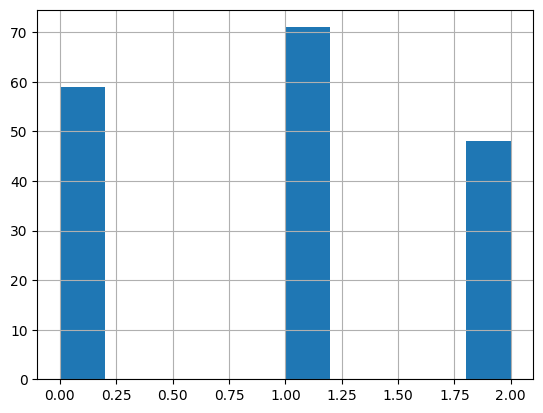

In [7]:
X['class'].hist()


<Axes: xlabel='Frequency'>

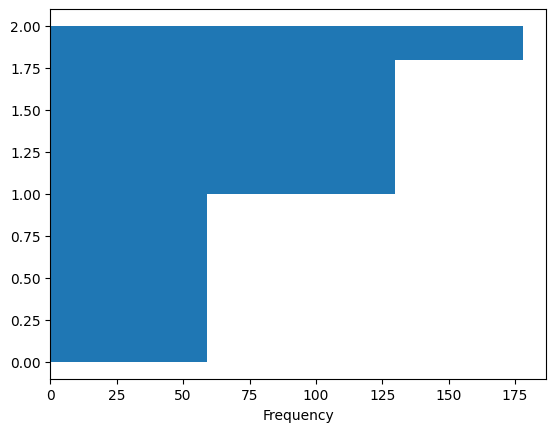

In [8]:
X['class'].plot.hist(orientation="horizontal", cumulative=True) #самый неудобный график

In [9]:
from collections import Counter
print(Counter(y))

Counter({1: 71, 0: 59, 2: 48})


<Axes: >

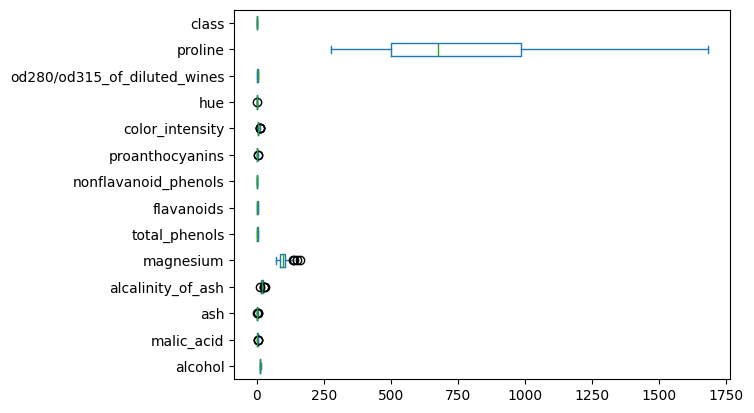

In [10]:
X.plot.box(vert=False)

<Axes: >

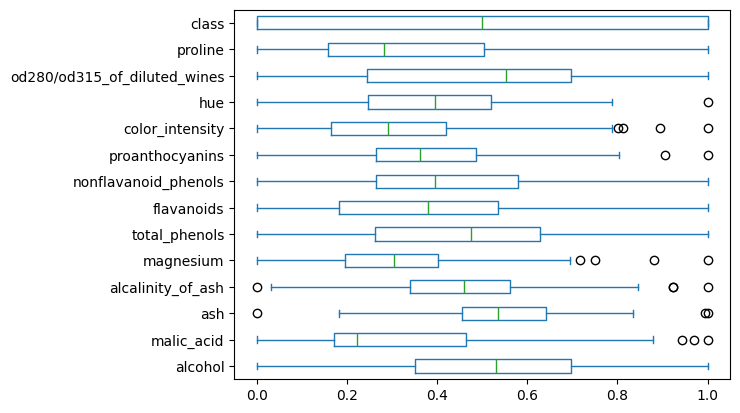

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #масштабирует все колонки и возвращает numpy array
pd.DataFrame(scaler.fit_transform(X), columns = X.columns).plot.box(vert=False)

<Axes: >

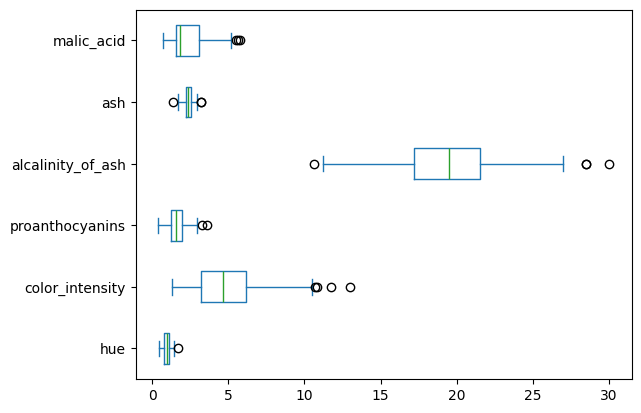

In [13]:
with_outliners = ['hue', 'color_intensity', 'proanthocyanins',
'alcalinity_of_ash', 'ash', 'malic_acid'] # , 'magnesium'
X[with_outliners].plot.box(vert=False)

<Axes: >

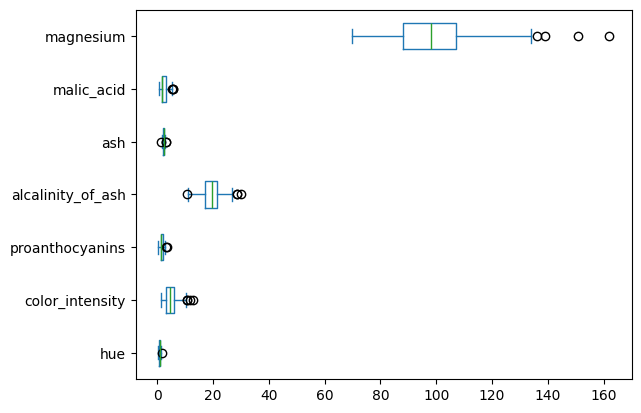

In [14]:
with_outliners = ['hue', 'color_intensity', 'proanthocyanins',
'alcalinity_of_ash', 'ash', 'malic_acid', 'magnesium'] #  
X[with_outliners].plot.box(vert=False)

<Axes: >

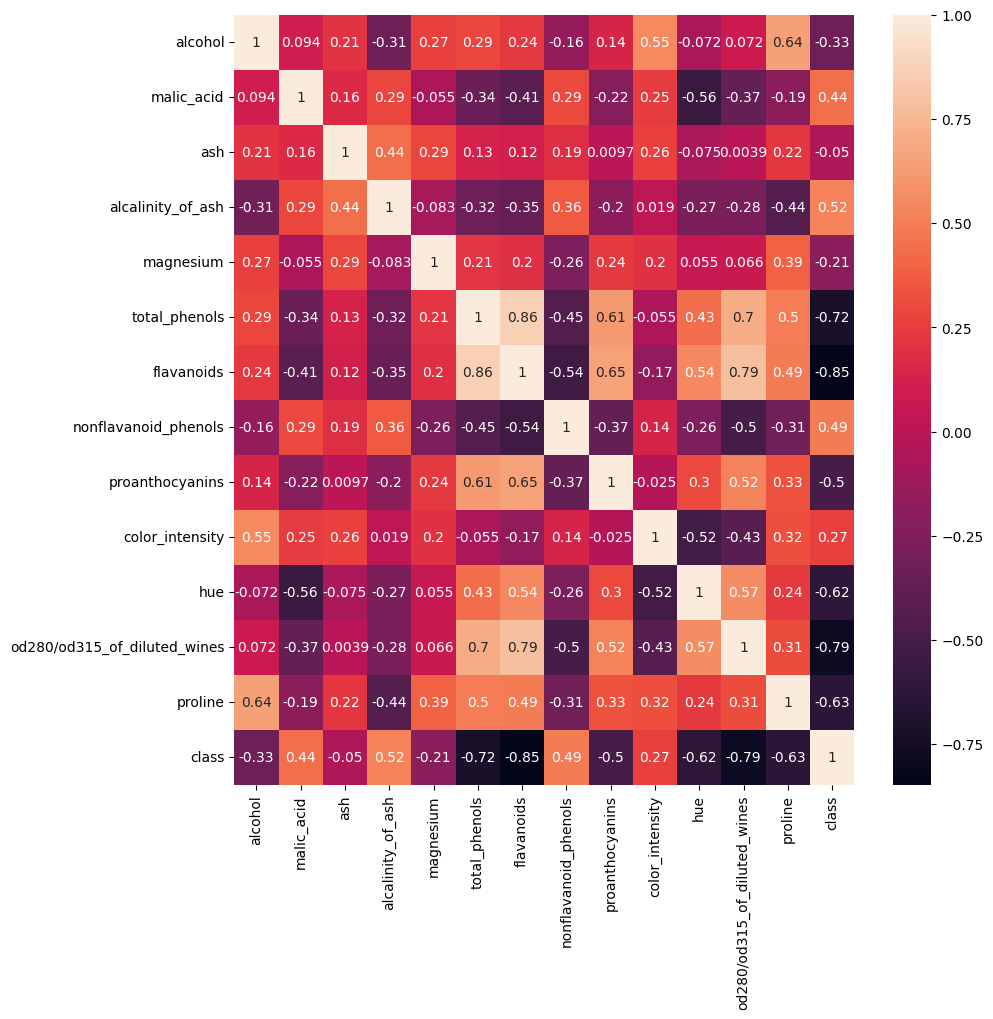

In [15]:
plt.figure(figsize=(10,10)) # чем светлее квадрат, тем больше корреляция, отрицательная корреляция тоже учитывается, например -0.86 это тоже сильная корреляция. Т.е. смотрим корреляции либо ближе к 1, либо ближе к -1.
cmap=X.corr()
sns.heatmap(cmap, annot=True)
#диаграмма должна нести одну мысль

In [17]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

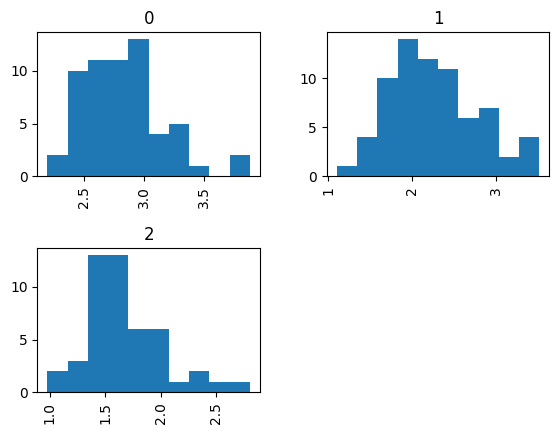

In [18]:
X['total_phenols'].hist(by=X['class'])#по Y частота, по X - сорт

<Axes: xlabel='total_phenols', ylabel='flavanoids'>

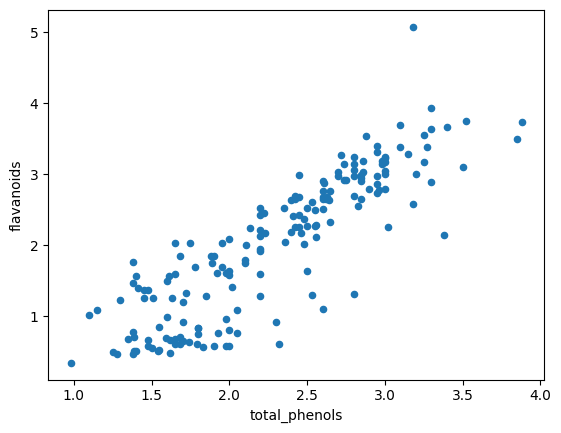

In [20]:
X.plot.scatter(x="total_phenols", y="flavanoids")

<Axes: xlabel='total_phenols', ylabel='flavanoids'>

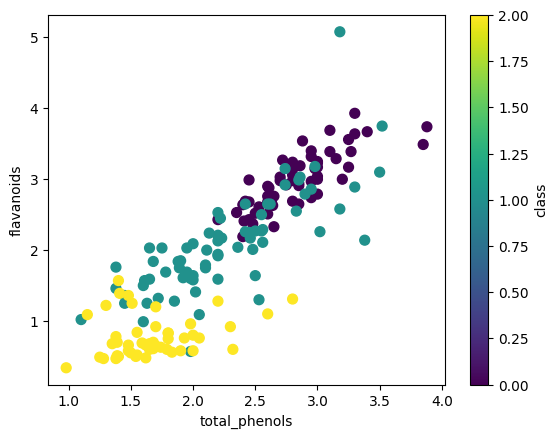

In [19]:
X.plot.scatter(x="total_phenols", y="flavanoids", c="class", s=50, colormap='viridis')

In [21]:
good_corr = ['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines',
'hue', 'proline', 'nonflavanoid_phenols', 'alcalinity_of_ash']

pairs = [(good_corr[i], good_corr[j]) for i in range(len(good_corr)) for j in
range(i+1, len(good_corr))]

non_repeated_pairs = []
seen_pairs = set()
for pair in pairs:
    reversed_pair = (pair[1], pair[0]) # Check both (a, b) and (b, a)
    if pair not in seen_pairs and reversed_pair not in seen_pairs:
        non_repeated_pairs.append(pair)
        seen_pairs.add(pair)
print(len(non_repeated_pairs))

21


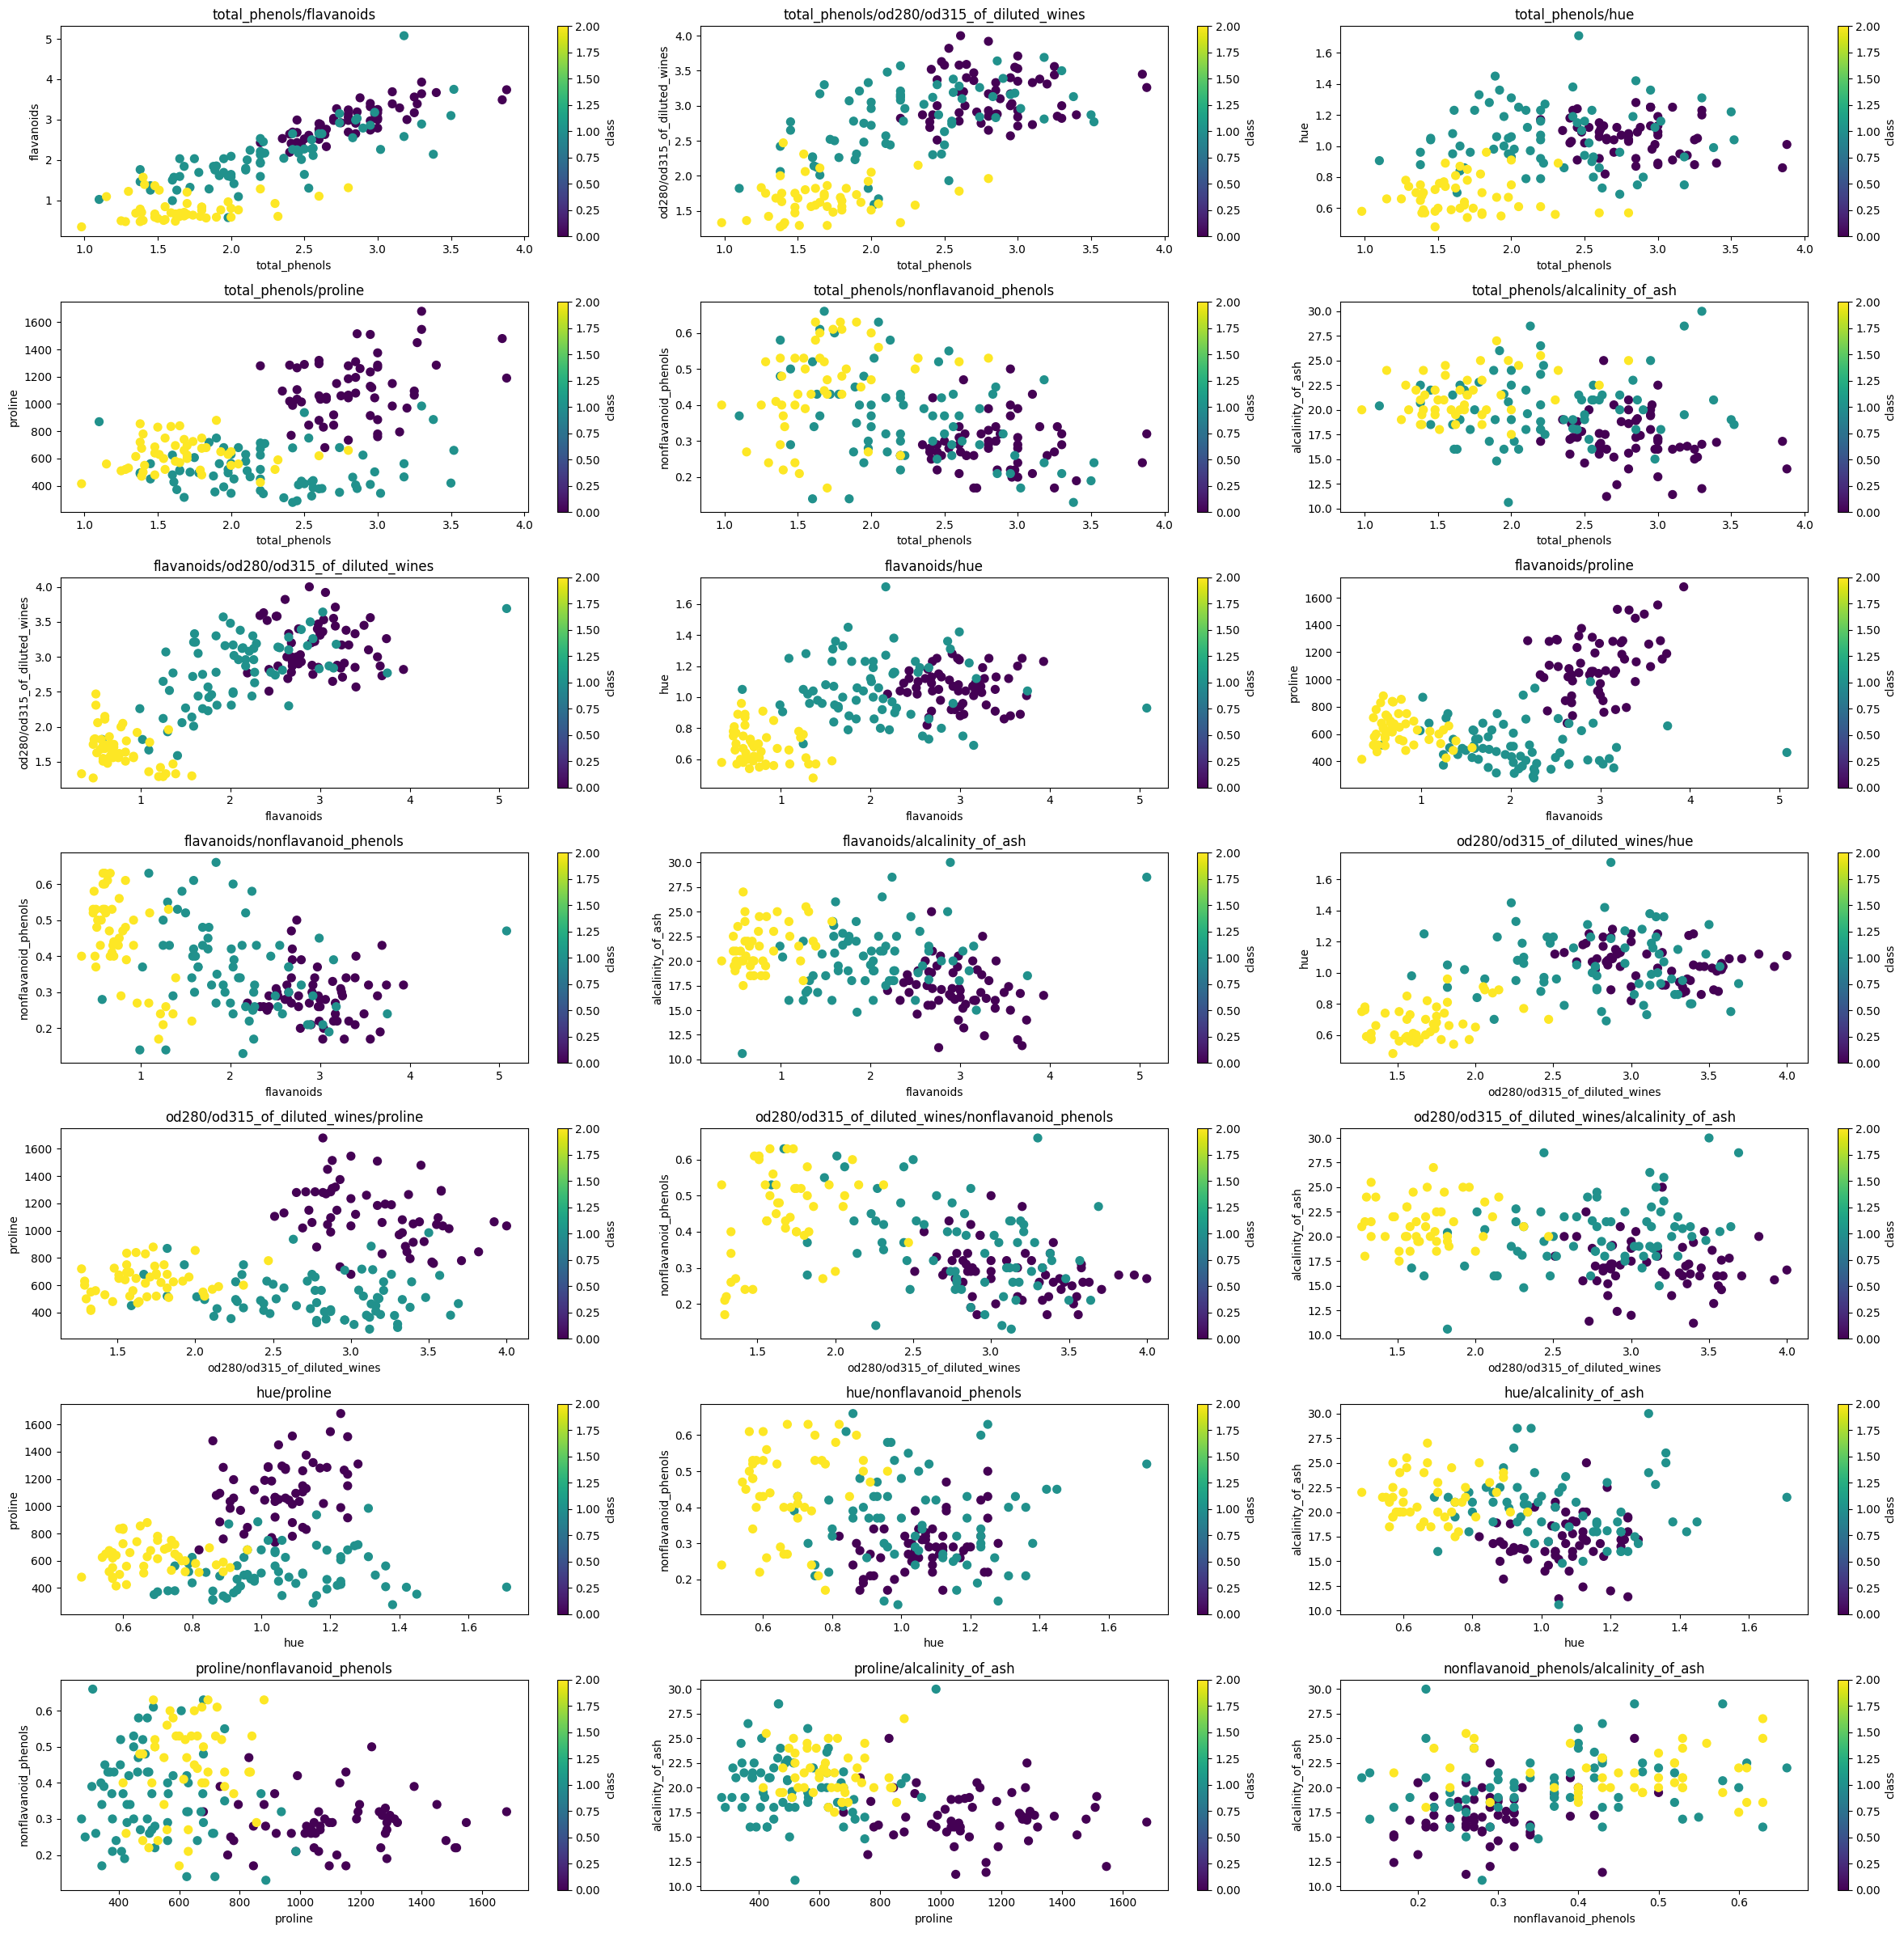

In [22]:
num_plots = len(non_repeated_pairs)
num_rows = num_plots // 3
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(24, 24))
if num_rows == 1 or num_cols == 1:
    axs = axs.flatten()

axe = axs.ravel()
for i, pair in enumerate(non_repeated_pairs):
    X.plot.scatter(x=pair[0], y=pair[1], c="class", s=50, colormap='viridis',
ax=axe[i])
    axe[i].set_title(f'{pair[0]}'+'/'+f'{pair[1]}')
    
plt.tight_layout()
plt.show()

In [ ]:
Постройте круговую диаграмму распределения классов.

<Axes: ylabel='count'>

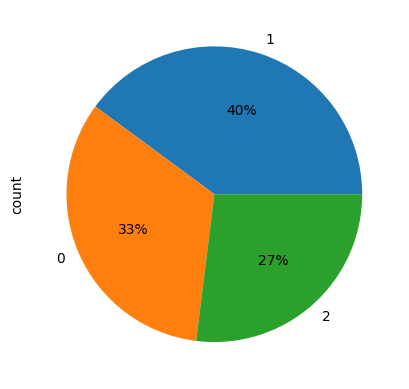

In [27]:
X['class'].value_counts().plot.pie(autopct='%.0f%%')

In [28]:
import seaborn  as sns

<Axes: >

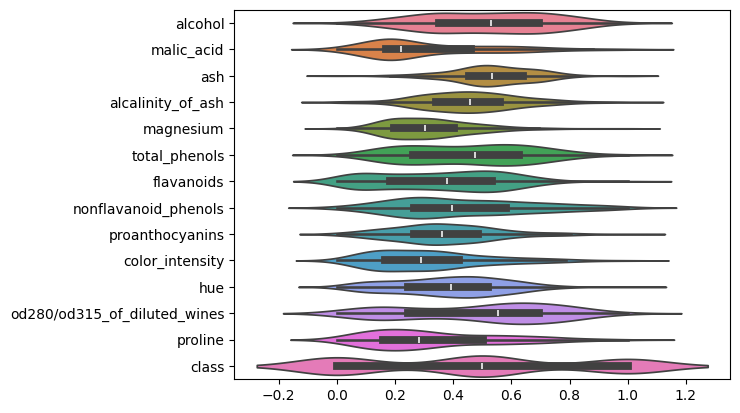

In [34]:
df= pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
sns.violinplot(data = df, orient = 'h')

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

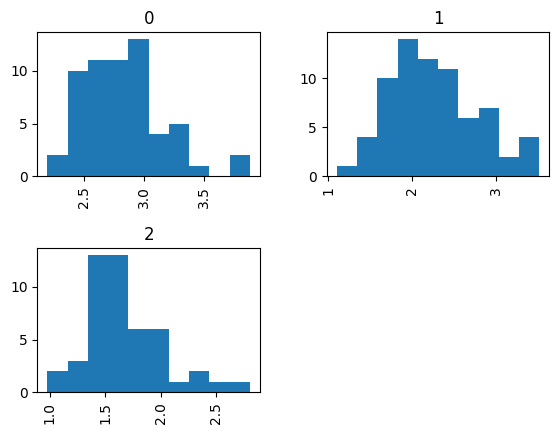

In [37]:
X['total_phenols'].hist(by=X['class'])

total_phenols    Axes(0.125,0.11;0.775x0.77)
dtype: object

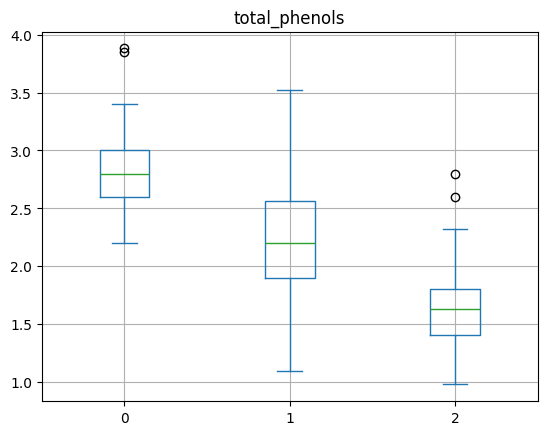

In [42]:
X.plot.box(column='total_phenols',by='class' ,grid=True)

In [ ]:
Prakticum

In [ ]:
1. Повторите следующий график, основываясь на данных из датасета tips:

In [49]:
data = sns.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [74]:
pv_data = data.pivot_table(values ='tip', aggfunc='sum', index='day', columns='time')
pv_data

C:\Users\user\AppData\Local\Temp\ipykernel_14128\697415522.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pv_data = data.pivot_table(values ='tip', aggfunc='sum', index='day', columns='time')


time,Lunch,Dinner
day,,
Thur,168.83,3.00
Fri,16.68,35.28
Sat,0.00,260.40
Sun,0.00,247.39


C:\Users\user\AppData\Local\Temp\ipykernel_14128\3648155197.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pv_data = data.pivot_table(values ='tip', aggfunc='sum', index='day', columns='time')


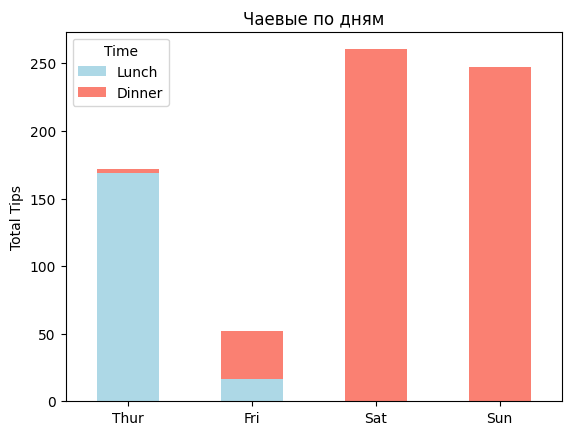

In [64]:
pv_data = data.pivot_table(values ='tip', aggfunc='sum', index='day', columns='time')
# pv_data = pv_data.sort_index(ascending=True)
pv_data.plot.bar(stacked=True, color=["lightblue", "salmon"])

plt.title('Чаевые по дням')
plt.ylabel('Total Tips')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(title='Time',loc=0)
plt.show()

In [ ]:
# Вариант Антона
data = pd.read_csv('tips.csv')

pv_data = data.pivot_table(values='tip',aggfunc='sum',index='day',columns='time')
pv_data['days_ind'] = [2,3,4,1]
pv_data = pv_data.sort_values(by='days_ind',ascending=True)
pv_data = pv_data.drop(columns='days_ind')
pv_data = pv_data[['Lunch','Dinner']]

pv_data.plot.bar(stacked=True, color=["lightblue", "salmon"])
plt.title('Чаевые по дням')
plt.ylabel('Total Tips')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(title='Time',loc=0)
plt.show()

<Axes: >

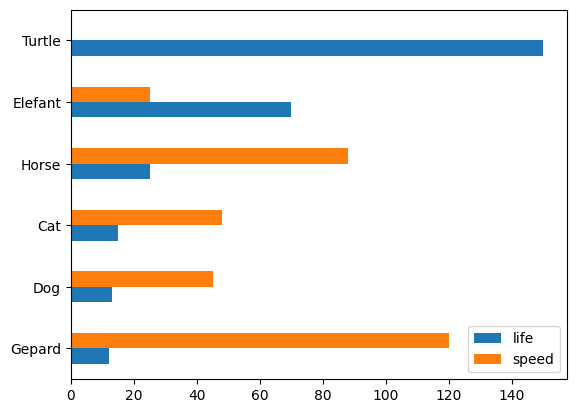

In [69]:
animals = ['Turtle', 'Elefant', 'Cat', 'Dog', 'Horse', 'Gepard']
life = [150, 70, 15, 13, 25, 12]
speed = [0.2, 25, 48, 45, 88, 120]

df = pd.DataFrame({'life': life, 'speed': speed}, index = animals).sort_values(by = 'life')
df
df.plot.barh()

In [ ]:
3. Загрузите набор данных titanic. Подсчитайте количество пассажиров в
каждом классе (столбец class). Визуализируйте распределение пассажиров
по классам с помощью круговой диаграммы.

In [71]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: ylabel='count'>

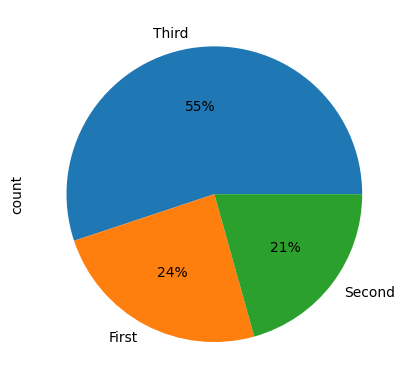

In [72]:
titanic['class'].value_counts().plot.pie(autopct='%.0f%%')